In [93]:
import pandas as pd
from datetime import datetime

In [94]:
df = pd.read_pickle('C:\Cnpjs\99 - cnpj\cnpjs.pkl')
df_emp = pd.read_pickle('C:\Cnpjs\99 - cnpj\Empresas\empresa.pkl')
df_est = pd.read_pickle('C:\Cnpjs\99 - cnpj\Estabelecimentos\estabelecimentos.pkl')
df_natur_jud = pd.read_pickle(r'C:\Cnpjs\99 - cnpj\naturezas\natureza_juridica.pkl')
df_qualifics = pd.read_pickle('C:\Cnpjs\99 - cnpj\Qualificacoes\qualificacoes.pkl')
df_cnaes = pd.read_pickle('C:\Cnpjs\99 - cnpj\Cnaes\cnaes.pkl')
df_municipio = pd.read_pickle('C:\Cnpjs\99 - cnpj\Municipios\municipio.pkl')
df_socios = pd.read_pickle('C:\Cnpjs\99 - cnpj\Socios\socios.pkl')
df_motivos = pd.read_pickle(r'C:\Cnpjs\99 - cnpj\Motivos\motivos.pkl')
df_simples = pd.read_pickle(r'C:\Cnpjs\99 - cnpj\\Simples\simples.pkl')
df_imunes_isentas = pd.read_pickle(r'C:\Cnpjs\99 - cnpj\Imunes e isentas\imunes_isentas.pkl')
df_lucro_arbitrado = pd.read_pickle(r'C:\Cnpjs\99 - cnpj\Lucro Arbitrado\lucro_arbitrado.pkl')
df_lucro_presumido = pd.read_pickle(r'C:\Cnpjs\99 - cnpj\Lucro Presumido\lucro presumido.pkl')
df_lucro_real = pd.read_pickle(r'C:\Cnpjs\99 - cnpj\Lucro Real\lucro real.pkl')

In [95]:
df.shape

(5634, 5)

In [96]:
df = pd.merge(df,df_emp, on='cnpj_basico', how='inner')

In [97]:
df.shape

(5630, 11)

In [98]:
hoje = datetime.today().date()
print(type(hoje))

<class 'datetime.date'>


In [99]:
df['porte'] = df['porte'].astype(int)

map_porte = {0: 'Não Informado',
             1: 'Micro Empresa',
             3: 'Empresa Pequeno Porte',
             5: 'Demais'}
df['porte'] = df['porte'].replace(map_porte)
df['porte'].unique()

array(['Micro Empresa', 'Demais', 'Empresa Pequeno Porte'], dtype=object)

In [100]:
df_qtd_estbs = df_est['cnpj_basico'].value_counts().to_frame()
df_qtd_estbs.reset_index(inplace=True)
df_qtd_estbs.set_axis(['cnpj_basico','quantidade_estabelecimentos_grupo'], axis='columns',inplace=True)
df = pd.merge(df, df_qtd_estbs, on='cnpj_basico', how='inner')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 0 to 5629
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   cnpj                               5630 non-null   object
 1   len                                5630 non-null   int64 
 2   cnpj_basico                        5630 non-null   int64 
 3   cnpj_dv                            5630 non-null   int64 
 4   cnpj_ordem                         5630 non-null   int64 
 5   razao_social                       5630 non-null   object
 6   natureza_jur                       5630 non-null   int64 
 7   quali_resp                         5630 non-null   int64 
 8   capital_social                     5630 non-null   object
 9   porte                              5630 non-null   object
 10  ente_fed_resp                      1 non-null      object
 11  quantidade_estabelecimentos_grupo  5630 non-null   int64 
dtypes: int

In [102]:
df = pd.merge(df, df_est, on=['cnpj_basico','cnpj_ordem','cnpj_dv'], how='inner')
df.head(1)

,cnpj,len,cnpj_basico,cnpj_dv,cnpj_ordem,razao_social,natureza_jur,quali_resp,capital_social,porte,...,municipio,ddd1,telefone1,ddd2,telefone2,ddd_fax,fax,correio_eletronico,situacao_especial,data_situacao_especial
0,02199488000153,14,2199488,53,1,ALLTECK SISTEMAS DE ENERGIA E INFRA-ESTRUTURA ...,2062,49,"160000,00",Micro Empresa,...,6001,21.0,24476114,21.0,22245636.0,21.0,24476114,COMERCIAL@ALLTECK.COM.BR,NaN,NaN


In [103]:
df['data_inicio_atv'] = pd.to_datetime(df['data_inicio_atv'], format='%Y%m%d')
df['idade_empresa'] = df['data_inicio_atv'].apply(lambda x: (hoje - x.date()).days // 365)
df.drop(['data_inicio_atv'], axis='columns',inplace=True)

In [104]:
df['id_matriz_filial'] = df['id_matriz_filial'].astype(int)

map_matriz_filial = {1: 'Matriz',
             2: 'Filial'}
df['id_matriz_filial'] = df['id_matriz_filial'].replace(map_matriz_filial)
df['id_matriz_filial'].unique()

array(['Matriz', 'Filial'], dtype=object)

In [105]:
df['sit_cadastral'] = df['sit_cadastral'].astype(int)

map_sit_cad = {1: 'Nula',
               2: 'Ativa',
               3: 'Suspensa',
               4: 'Inapta',
               8: 'Baixada'}
df['sit_cadastral'] = df['sit_cadastral'].replace(map_sit_cad)
df['sit_cadastral'].unique()

array(['Ativa', 'Inapta', 'Baixada', 'Suspensa'], dtype=object)

In [106]:
df_natur_jud.set_axis(['natureza_jur','natureza_juridica'], axis='columns', inplace=True)
df = pd.merge(df, df_natur_jud, on='natureza_jur', how='inner')

In [107]:
df['natureza_jur'] = df['natureza_juridica']
df.drop(['natureza_juridica'], axis='columns', inplace=True)

In [108]:
df.head(1)

,cnpj,len,cnpj_basico,cnpj_dv,cnpj_ordem,razao_social,natureza_jur,quali_resp,capital_social,porte,...,ddd1,telefone1,ddd2,telefone2,ddd_fax,fax,correio_eletronico,situacao_especial,data_situacao_especial,idade_empresa
0,02199488000153,14,2199488,53,1,ALLTECK SISTEMAS DE ENERGIA E INFRA-ESTRUTURA ...,Sociedade Empresária Limitada,49,"160000,00",Micro Empresa,...,21.0,24476114,21.0,22245636.0,21.0,24476114,COMERCIAL@ALLTECK.COM.BR,NaN,NaN,25


In [109]:
df_qualifics.set_axis(['quali_resp','des_qualificaccao'], axis='columns',inplace=True)
df = pd.merge(df, df_qualifics, on=['quali_resp'], how='inner')
df.shape

(5616, 40)

In [110]:
df['quali_resp'] = df['des_qualificaccao']
df.drop(['des_qualificaccao'], axis='columns', inplace=True)


In [111]:
df_cnaes.head(1)

,cod_cnae,des_cnae
0,111301,Cultivo de arroz


In [112]:
df_cnaes.set_axis(['cnae_fiscal_principal','des_cnae'], axis='columns', inplace=True)
df = pd.merge(df, df_cnaes, on=['cnae_fiscal_principal'], how='inner')
df.shape

(5616, 40)

In [113]:
df['cnae_fiscal_principal'] = df['des_cnae']
df.drop(['des_cnae'], axis='columns', inplace=True)

In [114]:
df_municipio.set_axis(['municipio','des_municipio'], axis='columns', inplace=True)
df_municipio

,municipio,des_municipio
0,1,GUAJARA-MIRIM
1,2,ALTO ALEGRE DOS PARECIS
2,3,PORTO VELHO
3,4,BURITIS
4,5,JI-PARANA
...,...,...
5566,9989,SERRA ALTA
5567,9991,TUNAPOLIS
5568,9993,GUARINOS
5569,9995,RIO QUENTE


In [115]:
df = pd.merge(df, df_municipio, on='municipio', how='inner')
df.shape

(5616, 40)

In [116]:
df['municipio'] = df['des_municipio']
df.drop(['des_municipio'], axis='columns',inplace=True)

In [117]:
df_socios.head(1)

,cnpj_basico,id_socio,nome_razao_socio,cpf_cnpj_socio,qualifica_socio,data_entrada_sociedade,pais,representante_legal,nome_representante,qualifica_representante,faixa_etaria
0,5142031,2,RICARDO PANICALI,***896528**,49,20020628,NaN,***000000**,NaN,0,6


In [118]:
df_qtd_socios = df_socios['cnpj_basico'].value_counts().to_frame()
df_qtd_socios.reset_index(inplace=True)
df_qtd_socios.set_axis(['cnpj_basico','quantidade_socios_grupo'], axis='columns',inplace=True)
df = pd.merge(df, df_qtd_socios, on='cnpj_basico', how='left')

In [119]:
df.shape

(5616, 40)

In [120]:
from numpy import double

df['capital_social'] = df['capital_social'].apply(lambda x: x.replace(',','.'))
df['capital_social'] = df['capital_social'].astype(double)

In [121]:
df_socios['id_socio'] = df_socios['id_socio'].astype(int)

map_id_estrangeiro = {1: 'Pessoa Jurídica',
               2: 'Pessoa Física',
               3: 'Estrangeiro'}
df_socios['id_socio'] = df_socios['id_socio'].replace(map_id_estrangeiro)
df_socios['id_socio'].unique()

array(['Pessoa Física', 'Pessoa Jurídica', 'Estrangeiro'], dtype=object)

In [122]:
df_socios['faixa_etaria'] = df_socios['faixa_etaria'].astype(int)

map_faixa_etaria_de = {1: 0,
                       2: 13,
                       3: 21,
                       4: 31,
                       5: 41,
                       6: 51,
                       7: 61,
                       8: 71,
                       9: 81}
df_socios['faixa_etaria_de'] = df_socios['faixa_etaria'].replace(map_faixa_etaria_de)
df_socios['faixa_etaria_de'].unique()

array([51, 61,  0, 31, 41, 71, 81, 21, 13])

In [123]:
map_faixa_etaria_ate = {1: 12,
                       2: 20,
                       3: 30,
                       4: 40,
                       5: 50,
                       6: 60,
                       7: 70,
                       8: 80,
                       9: 90}
df_socios['faixa_etaria_ate'] = df_socios['faixa_etaria'].replace(map_faixa_etaria_ate)
df_socios['faixa_etaria_ate'].unique()

array([60, 70,  0, 40, 50, 80, 90, 30, 20, 12])

In [124]:
df_socios['media_faixa']  = (df_socios['faixa_etaria_ate']+df_socios['faixa_etaria_de'])/2

In [125]:
df_socios_pf = df_socios.query("id_socio=='Pessoa Física'")
df_socios_med_idade = df_socios_pf.groupby('cnpj_basico')['media_faixa'].mean().to_frame().reset_index()
df_socios_med_idade.set_axis(['cnpj_basico','media_idade_socios_pf'], axis='columns',inplace=True)
df = pd.merge(df, df_socios_med_idade, on='cnpj_basico', how='left')

<AxesSubplot:>

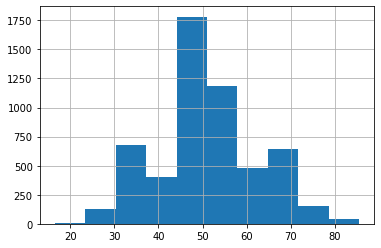

In [126]:
df.media_idade_socios_pf.hist()

In [127]:
df_simples.head(1)

,cnpj_basico,opcao_simples,data_opcao_simples,data_exclusao_simples,opcao_mei,data_opcao_mei,data_exclusao_mei
405054,2172808,S,20070701,0,N,0,0


In [128]:
df_xk_simples = df_simples.groupby('cnpj_basico')['cnpj_basico'].count().to_frame()
df_xk_simples.set_axis(['qtd_linhas'], axis='columns',inplace=True)
df_xk_simples.reset_index(inplace=True)
df_xk_simples.query('qtd_linhas > 1')

,cnpj_basico,qtd_linhas


In [129]:
df_simples.shape

(24, 7)

In [130]:
df_simples = df_simples.query("opcao_simples=='S' and data_exclusao_simples==0")
df = pd.merge(df, df_simples[['cnpj_basico','opcao_simples']], on='cnpj_basico', how='left')
df.shape

(5616, 42)

In [131]:
df_motivos.head(1)
df_motivos.set_axis(['motivo_sit_cadastral','des_sit_cadastral'], axis='columns',inplace=True)


In [132]:
df = pd.merge(df, df_motivos, on='motivo_sit_cadastral', how='left')
df.shape

(5616, 43)

In [133]:
df['motivo_sit_cadastral'] = df['des_sit_cadastral']
df.drop('des_sit_cadastral', axis='columns',inplace=True)

In [134]:
df.to_pickle('Empresas.pkl')
#df.to_excel('Empresas.xlsx')